# EDA on Haberman Dataset

## The dataset contains cases from a study that was conducted between
## 1958 and 1970 at the University of Chicago's Billings Hospital on
## the survival of patients who had undergone surgery for breast cancer.

### Number of Instances: 306
### Number of Attributes: 4 (including the class attribute)

### Attribute Information:

### 1. Age of patient at time of operation (numerical)
### 2. Patient's year of operation (year - 1900, numerical)
### 3. Number of positive axillary nodes detected (numerical)
### 4. Survival status (class attribute)
### 5. 1 = the patient survived 5 years or longer
### 6. 2 = the patient died within 5 year

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Read the dataset to a pandas dataframe 
df_hbm = pd.read_csv('haberman.csv')

In [5]:
# Check the shape of the dataset
df_hbm.shape

(305, 4)

In [6]:
# Read the first few rows of the dataset
df_hbm.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


### Observation 1:

### 1) We see that one of the datapoint or instance is being used as header row.
### It would be more easier to have column names for better understanding.
### 2) The survival_status column has numerical data and is difficult for interpretation.
### It is better to change it to categorical type (Yes/No type)
### 3) The survival_status = 1 can be changed to 'Yes' and survival_status = 2 can changed to 'No', for convenience


In [7]:
# Add the column names to the dataset and check the first few rows
usercols = ['age','year','positive_axiliary_nodes','survival_status']
df_hbm = pd.read_csv('haberman.csv',names=usercols)
df_hbm.head(10)

,age,year,positive_axiliary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [8]:
# The year column is showing only two digits 
# We can update the year column i.e. show the actual year as '1968' rather than '68'

df_hbm['year'] += 1900
df_hbm.head()


,age,year,positive_axiliary_nodes,survival_status
0,30,1964,1,1
1,30,1962,3,1
2,30,1965,0,1
3,31,1959,2,1
4,31,1965,4,1


In [9]:
# Before doing EDA, we can check if the dataset has any empty values
# or also any duplicate rows
# First, we will go through to check if any empty values are there
df_hbm.isnull().any()

age                        False
year                       False
positive_axiliary_nodes    False
survival_status            False
dtype: bool

In [10]:
# Check if there are any duplicate values
df_hbm.duplicated().sum()

17

### Observation 2:
### 1) This means there are no null values in the dataset
### 2) There are 17 duplicate rows in the dataset

In [11]:
# now we will find the duplicate rows, and then drop them 
df_hbm[df_hbm.duplicated()]

,age,year,positive_axiliary_nodes,survival_status
23,37,1963,0,1
27,38,1960,0,1
52,41,1965,0,1
65,43,1964,0,2
78,44,1961,0,1
108,48,1958,11,2
132,50,1961,0,1
179,54,1962,0,1
184,55,1958,1,1
196,56,1960,0,1


In [12]:
# Remove the duplicates and update the dataframe
# check the shape of the new dataframe 

df_hbm_updated = df_hbm.drop_duplicates()
df_hbm_updated.shape

(289, 4)

In [13]:
# Check the brief statistics of the dataframe
df_hbm_updated.describe()

,age,year,positive_axiliary_nodes,survival_status
count,289.000000,289.000000,289.000000,289.000000
mean,52.422145,1962.906574,4.221453,1.273356
std,10.876915,3.275794,7.325239,0.446455
min,30.000000,1958.000000,0.000000,1.000000
25%,44.000000,1960.000000,0.000000,1.000000
50%,52.000000,1963.000000,1.000000,1.000000
75%,60.000000,1966.000000,5.000000,2.000000
max,83.000000,1969.000000,52.000000,2.000000


### Observation 3:
### 1. Mean age is observed to be at 52 (rounded to lowest) with max age being 83 and min age being 30.
### 2. Mean year of patients' operation is observed to be 1962 with min year being 1960 and max year being 1969
### 3. Mean of positive axiliary nodes is observed to be at 4, with min being 0 and max being 52. Interesting observation is, that the positive axiliary nodes corresponding to 75 percentile is 5, and 50 percentile value is only 1. 

In [14]:
# Change the survival status column values to 'Yes' and 'No'
# 1 - Yes, 2 - No
df_hbm_updated['survival_status'].replace(to_replace = [1,2], value=['Yes','No'],inplace=True)
df_hbm_updated.head(10)

,age,year,positive_axiliary_nodes,survival_status
0,30,1964,1,Yes
1,30,1962,3,Yes
2,30,1965,0,Yes
3,31,1959,2,Yes
4,31,1965,4,Yes
5,33,1958,10,Yes
6,33,1960,0,Yes
7,34,1959,0,No
8,34,1966,9,No
9,34,1958,30,Yes


In [15]:
# Calculate the percentage of survival and non survival patients from the dataset
df_hbm_updated['survival_status'].value_counts()

Yes    210
No      79
Name: survival_status, dtype: int64

In [16]:
# Calculate the percentage of the survival and non-survival patients
(df_hbm_updated['survival_status'].value_counts())/(len(df_hbm_updated))

Yes    0.726644
No     0.273356
Name: survival_status, dtype: float64

### Observation 4:
### 1. From the above results, the patients who survived the surgery is 72.66 % whereas the patients' who couldn't survive is 27.33 %. 
### 2. The dataset is imbalanced.
### 3. Further analysis needs to be done to understand the influence of the features on the target.

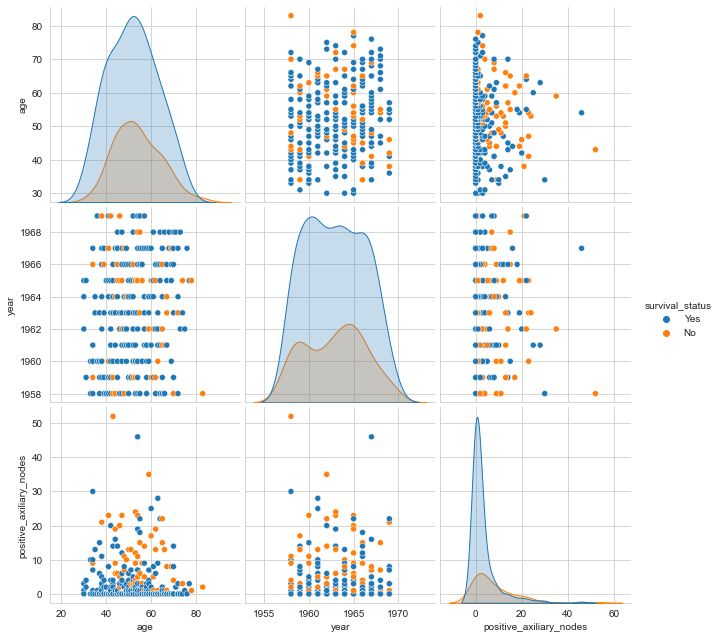

In [39]:
# Plotting pair plots
# Pair plots helps us to understand the best set of features to explain a relationship
# between two variables and also distribution of single variables
# It also helps us to see if we can do some simple classification models by observing 
# if there can be seperate clusters observed from the plots

plt.close()
sns.set_style('whitegrid')
sns.pairplot(df_hbm_updated, hue='survival_status', height = 3)
plt.show()

### Observation 5:
### 1.From the plots, it is evident that there is significant overlap for each of the plots.
### 2. A decisive conclusion/inference cant be explained about the influence of the features on target(survival status).
### 3. Most of the plots between any two variables have points jumbled/randomly scattered. 
### 4. The positive axiliary nodes variation w.r.t age shows that nearly 80%-90% of the people have about less than 5 nodes.


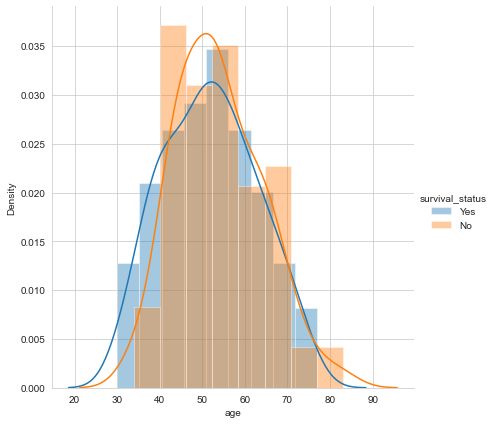

In [18]:
# Lets plot the distribution of individual features
# 1.Distribution plot of feature 'age'  

sns.FacetGrid(df_hbm_updated, hue='survival_status', size=6) \
    .map(sns.distplot, 'age').add_legend()
plt.show()

### Observations about 'age' feature:
### 1. There is a major overlap in the distributions for 'survived' and 'not survived'
### 2. The age group of 40-60 seems to be having more distribution for both survived and not survived patients. 

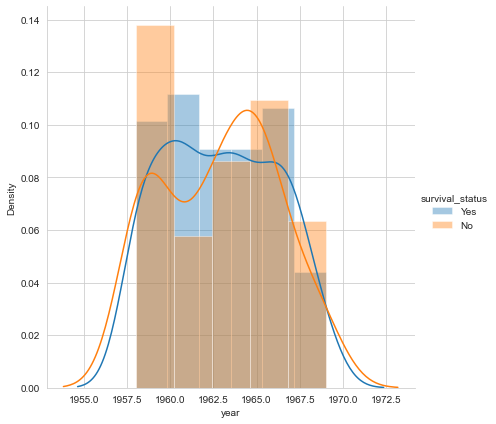

In [19]:
# 1.Distribution plot of feature 'year'  

sns.FacetGrid(df_hbm_updated, hue='survival_status', size=6) \
    .map(sns.distplot, 'year').add_legend()
plt.show()

### Observations about 'year' feature:
### 1. There is a major overlap in the distributions for 'survived' and 'not survived'
### 2. There seems to be more density between the year 1963-1967 for patients not survived the surgery, which indicates more deaths could have happened during that period. However this cannot be regarded as conclusive.


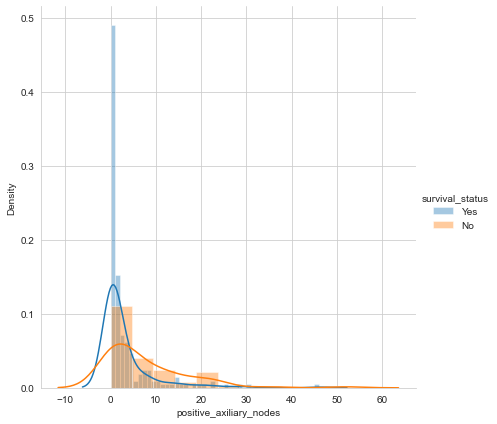

In [20]:
# 1.Distribution plot of feature 'positive_axiliary_nodes'  

sns.FacetGrid(df_hbm_updated, hue='survival_status', size=6) \
    .map(sns.distplot, 'positive_axiliary_nodes').add_legend()
plt.show()

### Observations about 'axiliary nodes' feature:
### 1. There is a not major, but significant overlap in the distributions for 'survived' and 'not survived'
### 2. The distribution shows that for the patients who survived the surgery, the positive axiliary nodes are almost less than or equal to 1.
### 3. After approximately 25 nodes, survival rate almost becomes negligible.
### 4. Hence, lesser are the axiliary nodes, more is the chance of survival.

In [21]:
# To understand the survival statuses more deeply, we will use CDF for each of the features
# Create two different dataframes for patients survived and patients not survived  

df_survived = df_hbm_updated.loc[df_hbm_updated['survival_status'] == 'Yes']
df_not_survived = df_hbm_updated.loc[df_hbm_updated['survival_status'] == 'No']
df_survived.head()

,age,year,positive_axiliary_nodes,survival_status
0,30,1964,1,Yes
1,30,1962,3,Yes
2,30,1965,0,Yes
3,31,1959,2,Yes
4,31,1965,4,Yes


In [22]:
df_not_survived.head()

,age,year,positive_axiliary_nodes,survival_status
7,34,1959,0,No
8,34,1966,9,No
24,38,1969,21,No
34,39,1966,0,No
43,41,1960,23,No


In [23]:
# Plot PDF and CDF of age for patients who survived
counts, bin_edges = np.histogram(df_survived['age'], bins=10, density=True)
pdf_age_yes = counts/(sum(counts))

print(pdf_age_yes)
print(bin_edges)

[0.05714286 0.1047619  0.12380952 0.1        0.17142857 0.15714286
 0.08571429 0.1047619  0.06666667 0.02857143]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


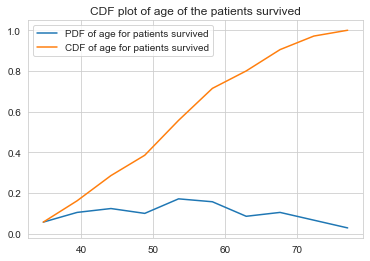

In [24]:
# Plot CDF of the feature 'age' for patients who survived
cdf_age_yes = np.cumsum(pdf_age_yes)
plt.title('CDF plot of age of the patients survived')
plt.plot(bin_edges[1:], pdf_age_yes, label='PDF of age for patients survived')
plt.plot(bin_edges[1:], cdf_age_yes, label='CDF of age for patients survived')
plt.legend()

### Observations from the above plot:
### 1. The PDF of age shows that the density is higher for age between 50-60. Hence, it is likely that the patients of age between 50-60 would have higher survival rate.
### 2. About 80% of the patients who survived are within the age of 65. 

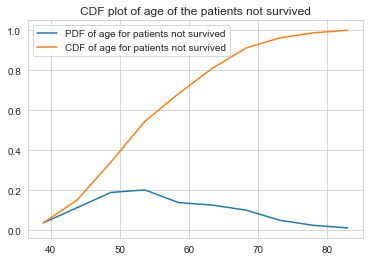

In [25]:
# Plot PDF and CDF of age for patients who didnt survive
counts, bin_edges = np.histogram(df_not_survived['age'], bins=10, density=True)
pdf_age_no = counts/(sum(counts))

# print(pdf_age_no)
# print(bin_edges)
cdf_age_no = np.cumsum(pdf_age_no)
plt.title('CDF plot of age of the patients not survived')
plt.plot(bin_edges[1:], pdf_age_no, label='PDF of age for patients not survived')
plt.plot(bin_edges[1:], cdf_age_no, label='CDF of age for patients not survived')
plt.legend()

### Observations from the above plot:
### 1. The PDF of age shows that the density is higher for age between 48-55. Hence, it is likely that the patients of age between 48-55 had less chance of survival.
### 2. About 80% of the patients who didnt survived are within the age of 65. Hence, it is difficult to conclude with this feature about the survival rate of patients.

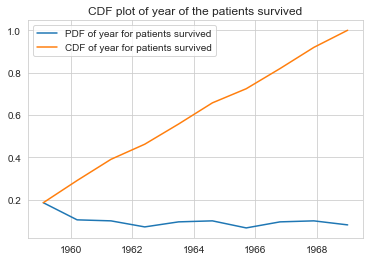

In [26]:
# Lets perform the same exercise with the other two features
# Plot PDF and CDF of year for patients who survived
counts, bin_edges = np.histogram(df_survived['year'], bins=10, density=True)
pdf_year_yes = counts/(sum(counts))
cdf_year_yes = np.cumsum(pdf_year_yes)
plt.title('CDF plot of year of the patients survived')
plt.plot(bin_edges[1:], pdf_year_yes, label='PDF of year for patients survived')
plt.plot(bin_edges[1:], cdf_year_yes, label='CDF of year for patients survived')
plt.legend()

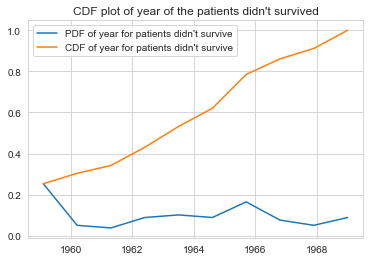

In [27]:
# Plot PDF and CDF of year for patients who didnt survived
counts, bin_edges = np.histogram(df_not_survived['year'], bins=10, density=True)
pdf_year_no = counts/(sum(counts))
cdf_year_no = np.cumsum(pdf_year_no)
plt.title("CDF plot of year of the patients didn't survived")
plt.plot(bin_edges[1:], pdf_year_no, label="PDF of year for patients didn't survive")
plt.plot(bin_edges[1:], cdf_year_no, label="CDF of year for patients didn't survive")
plt.legend()

### Observations from the above plots:
### 1. The PDF of year feature shows that the maximum survival rate and maximum unsurvival rate is more in the years between 1958 and 1960.
### 2. In the year 1965, the survival rate was less than the unsurvival rate, indicating that more no. of patients died in that year than the ones who survived.
### 3. CDF plots for both cases show similar trend, and hence conclusion can't be made based on only year of operation.

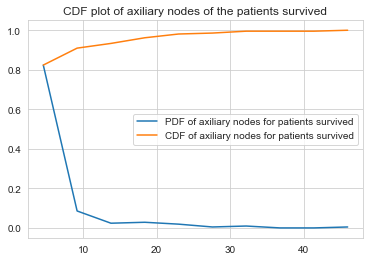

In [28]:
# Plot PDF and CDF of axiliary nodes for patients who survived
counts, bin_edges = np.histogram(df_survived['positive_axiliary_nodes'], bins=10, density=True)
pdf_nodes_yes = counts/(sum(counts))
cdf_nodes_yes = np.cumsum(pdf_nodes_yes)
plt.title('CDF plot of axiliary nodes of the patients survived')
plt.plot(bin_edges[1:], pdf_nodes_yes, label='PDF of axiliary nodes for patients survived')
plt.plot(bin_edges[1:], cdf_nodes_yes, label='CDF of axiliary nodes for patients survived')
plt.legend()

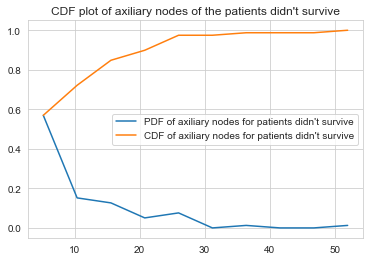

In [29]:
# Plot PDF and CDF of axiliary nodes for patients who didn't survived
counts, bin_edges = np.histogram(df_not_survived['positive_axiliary_nodes'], bins=10, density=True)
pdf_nodes_no = counts/(sum(counts))
cdf_nodes_no = np.cumsum(pdf_nodes_no)
plt.title("CDF plot of axiliary nodes of the patients didn't survive")
plt.plot(bin_edges[1:], pdf_nodes_no, label="PDF of axiliary nodes for patients didn't survive")
plt.plot(bin_edges[1:], cdf_nodes_no, label="CDF of axiliary nodes for patients didn't survive")
plt.legend()

### Observations from the above plots:
### 1. The PDF of nodes feature shows that there is more than 80% of survival rate if the axiliary nodes are less than 5. Also, as the number of axiliary nodes increase, the survival rate decreases.
### 2. However, the second plot of PDF also shows that there is maximum unsurvival rate if the axiliary nodes are almost less than 10.
### 3. Hence, the survival rate can not be concluded using the axiliary nodes alone.

In [30]:
# Lets try getting the mean, median, quantiles and percentiles for the features
print("Mean of the age of patients who survived and who didn't survive: ")
print(round(np.mean(df_survived['age']),2))
print(round(np.mean(df_not_survived['age']),2))

Mean of the age of patients who survived and who didn't survive: 
51.87
53.89


In [31]:
# Mean of the axiliary nodes for patients survived and not survived
print("Mean of axiliary nodes of patients who survived and who didn't survive: ")
print(np.mean(df_survived['positive_axiliary_nodes']))
print(np.mean(df_not_survived['positive_axiliary_nodes']))

Mean of axiliary nodes of patients who survived and who didn't survive: 
2.9857142857142858
7.506329113924051


### Observation: 
### 1.People with higher chance survival had average nodes of 2.98 
### 2.People with less chance of survival had average nodes of 7.5

In [32]:
# Medians 
print("Median of the age of patients who survived and who didn't survive: ")
print(np.median(df_survived['age']))
print(np.median(df_not_survived['age']))

Median of the age of patients who survived and who didn't survive: 
52.0
53.0


In [33]:
print("Median of axiliary nodes of patients who survived and who didn't survive: ")
print(np.median(df_survived['positive_axiliary_nodes']))
print(np.median(df_not_survived['positive_axiliary_nodes']))

Median of axiliary nodes of patients who survived and who didn't survive: 
1.0
4.0


In [34]:
# Get quantiles for feature age
print(np.percentile(df_survived['age'], np.arange(0,100,25)))
print(np.percentile(df_not_survived['age'], np.arange(0,100,25)))

[30.   43.   52.   59.75]
[34. 46. 53. 61.]


In [35]:
# Get quantiles for feature - positive axiliary nodes
print(np.percentile(df_survived['positive_axiliary_nodes'], np.arange(0,100,25)))
print(np.percentile(df_not_survived['positive_axiliary_nodes'], np.arange(0,100,25)))

[0. 0. 1. 3.]
[ 0.   1.   4.  11.5]


### Observations from the mean, median, percentile values:
### 1. The median age for the survived and non-survived patients is around 52 and 53.
### 2. The percentile values for the feature 'age' for both survived and non-survived patients are very close. 
### 3. The '50 percentile' value of positive axiliary nodes for survived and non-survived patients are observed to be 1.0 and 4.0 respectively. This means, lesser the positive axiliary nodes, better are the chances of survival. 

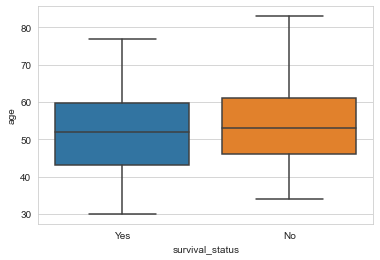

In [41]:
# Lets visualise the feature 'age' using box plots and whiskers
sns.boxplot(x='survival_status',y='age',data=df_hbm_updated)
plt.show()

### Observations: 
### 1. The average age of people who survived the surgery is 52 and the average people who didn't survive is 53. 
### 2. The majority of people who didn't survive the surgery are older than the people who survived the surgery. 

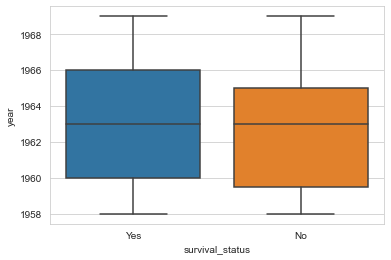

In [42]:
# Lets visualise the feature 'Operation year' using box plots and whiskers
sns.boxplot(x='survival_status',y='year',data = df_hbm_updated)
plt.show()

### Observations: 
### 1. The range of year of operation (i.e. Inter Quartile Range) in which patients survived the surgery is 1960-1966 and range of year of operation (i.e. Inter Quartile Range) in which patients didn't survive the surgery is 1958-1965.
### 2. Significant overlap is observed for the survived and non-survived patients between 1960-1965, which means there is relatively little increase in the patient survival after 1960.

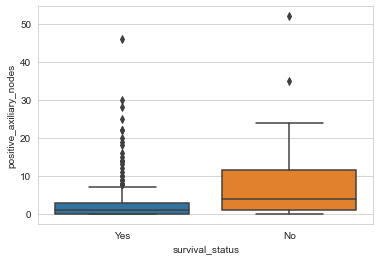

In [43]:
# Lets visualise the feature 'axiliary nodes' using box plots and whiskers
sns.boxplot(x='survival_status',y='positive_axiliary_nodes',data = df_hbm_updated)
plt.show()

### Observation:
### 1. The axiliary nodes for the survived patients is highly skewed towards zero nodes.
### 2. There are many outliers in the (nodes vs. survival_status == yes) distribution.  
### 3. The IQR for the survived patients is in the range of 0-3 (we have seen that from quantile data evaluation in one of the cells above) 
### 4. The IQR for axiliary nodes for the non-survived patient is in the range of 1-12, with the 75 percentile value being equal to 4 nodes.

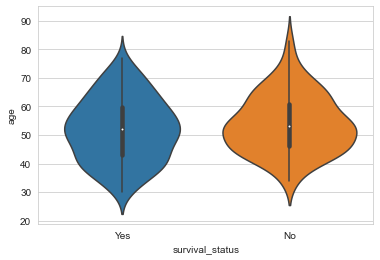

In [46]:
# Lets visualise using violin plots 
# For 'age' feature
sns.violinplot(x='survival_status',y='age',data = df_hbm_updated, height = 10)
plt.show()

### Observations from above plot:
### 1. It can be observed that most people are of age between 40-60
### 2. People within age group of 45-55 had less chance of survival.
### 3. Also, people within age group of 40 - 60 also had higher chance of survival. 
### 4. Hence, it is difficult to draw any conclusions from the 'age' feature alone.

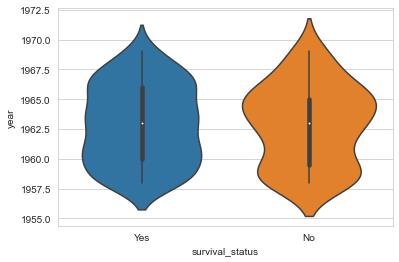

In [48]:
# For 'year' feature
sns.violinplot(x='survival_status',y='year',data = df_hbm_updated, height = 10)
plt.show()

### Observations from the above plot:
### 1. It is observed that during 1964-1966 less no. of people survived. Number of operations were unsuccessful during this period.
### 2. The survival chance was more during the period of 1958-1960, and after which there is slightly less chance of survival.

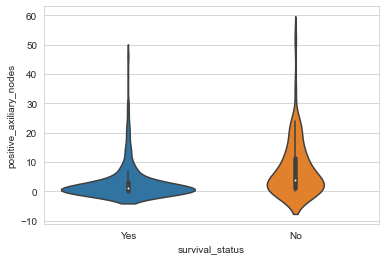

In [52]:
# For 'positive axiliary nodes' feature
sns.violinplot(x='survival_status',y='positive_axiliary_nodes',data = df_hbm_updated, height = 10)
plt.show()

### Observations from above plot:
### 1. Patients with less than or equal to 1 positive axiliary node, are more likely to survive.
### 2. Even though the survival rate is high when there are people with less than 1 node, there are also people who coudn't survive. 
### 3. Patients with more than 5 nodes, are likely to have less survival.

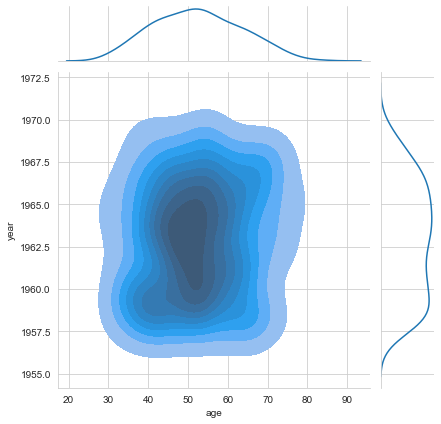

In [60]:
# Analysis of two or more variables
# Multi variate analysis using contour plots for 'age' and 'year' features

sns.jointplot(x='age',y='year',shade = 'fill', data = df_hbm_updated, kind='kde')
plt.show()

### Observations from the above plot:
### 1. The contour plot is more dense during the years 1960-1963 and age group of 45-55. This means more number of oeprations happened during 1960-63 and for patients of age-group of 45-55.
### 2. Comparitively, the patients of age group of 38-45 had more number of operations happened during the years 1958-1960.

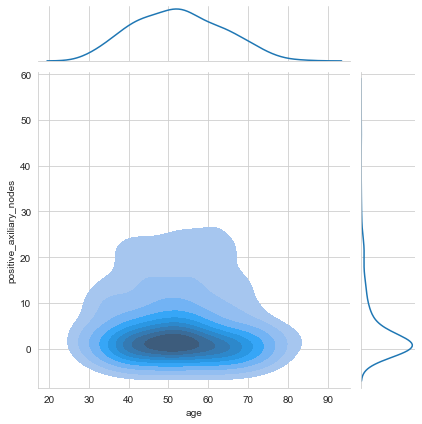

In [61]:
# Analysis of two or more variables
# Multi variate analysis using contour plots for 'age' and 'positive nodes' features

sns.jointplot(x='age',y='positive_axiliary_nodes', shade='fill',data = df_hbm_updated, kind='kde')
plt.show()

### Observations about the plot:
### 1. The contour plot is dense in the region of age group of 45-55 and most of the age groups have nodes less than 5. Most of them have around 0,1 nodes.  
### 2. There is a sharp decline in the number of patients w.r.t no.of positive nodes. 

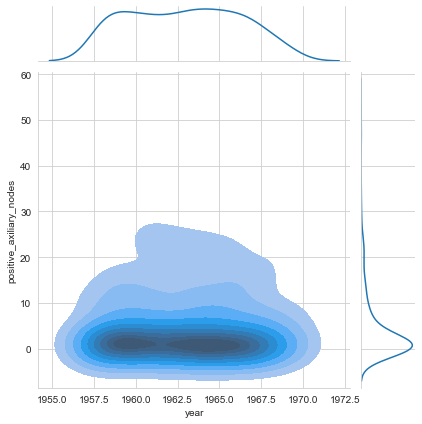

In [62]:
# Analysis of two or more variables
# Multi variate analysis using contour plots for 'year' and 'positive nodes' features

sns.jointplot(x='year',y='positive_axiliary_nodes', shade = 'fill',data = df_hbm_updated, kind='kde')
plt.show()

### Observations from the plot:
### 1. More positive nodes have been observed between the years 1958-1960 and 1963-1966.
### 2. Across all the years, the no.of positive nodes for most of the patients is within the range of 0-10.